# Loss Functions

In this exercise, you will compare the effects of Loss functions on a linear regression model.

👇 Import the data from the attached csv file

In [21]:
import pandas as pd
import numpy as np

data = pd.read_csv("data.csv")
data.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area,Average Temperature
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,0.234375,23.447480
std,0.105777,88.086116,43.626481,45.165950,1.75114,0.133221,9.742474
min,0.620000,514.500000,245.000000,110.250000,3.50000,0.000000,8.475000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,0.100000,14.375000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,0.250000,20.485000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,0.400000,32.167500
max,0.980000,808.500000,416.500000,220.500000,7.00000,0.400000,44.975000


🎯 Your task is to predict the average temperature inside a greenhouse based on its design. Your temperature predictions will help you select the appropriate greenhouse design for each plant, based on their climatic needs. 

🌿 You know that plants can handle small temperature variations, but are exponentially more sensitive as the temperature variations increase. 

## 1. Theory 

❓ Theoretically, which Loss function would you train your model on to limit the risk of killing plants?

<details>
<summary> 🆘 Answer </summary>
    
By theory, you would use a Mean Square Error (MSE) Loss function. It would penalize outlier predictions and prevent your model from committing large errors. This would ensure smaller temperature variations and a lower risk for plants.

</details>

MSE

## 2. Application

### 2.1 Preprocessing

👇 Scale the features

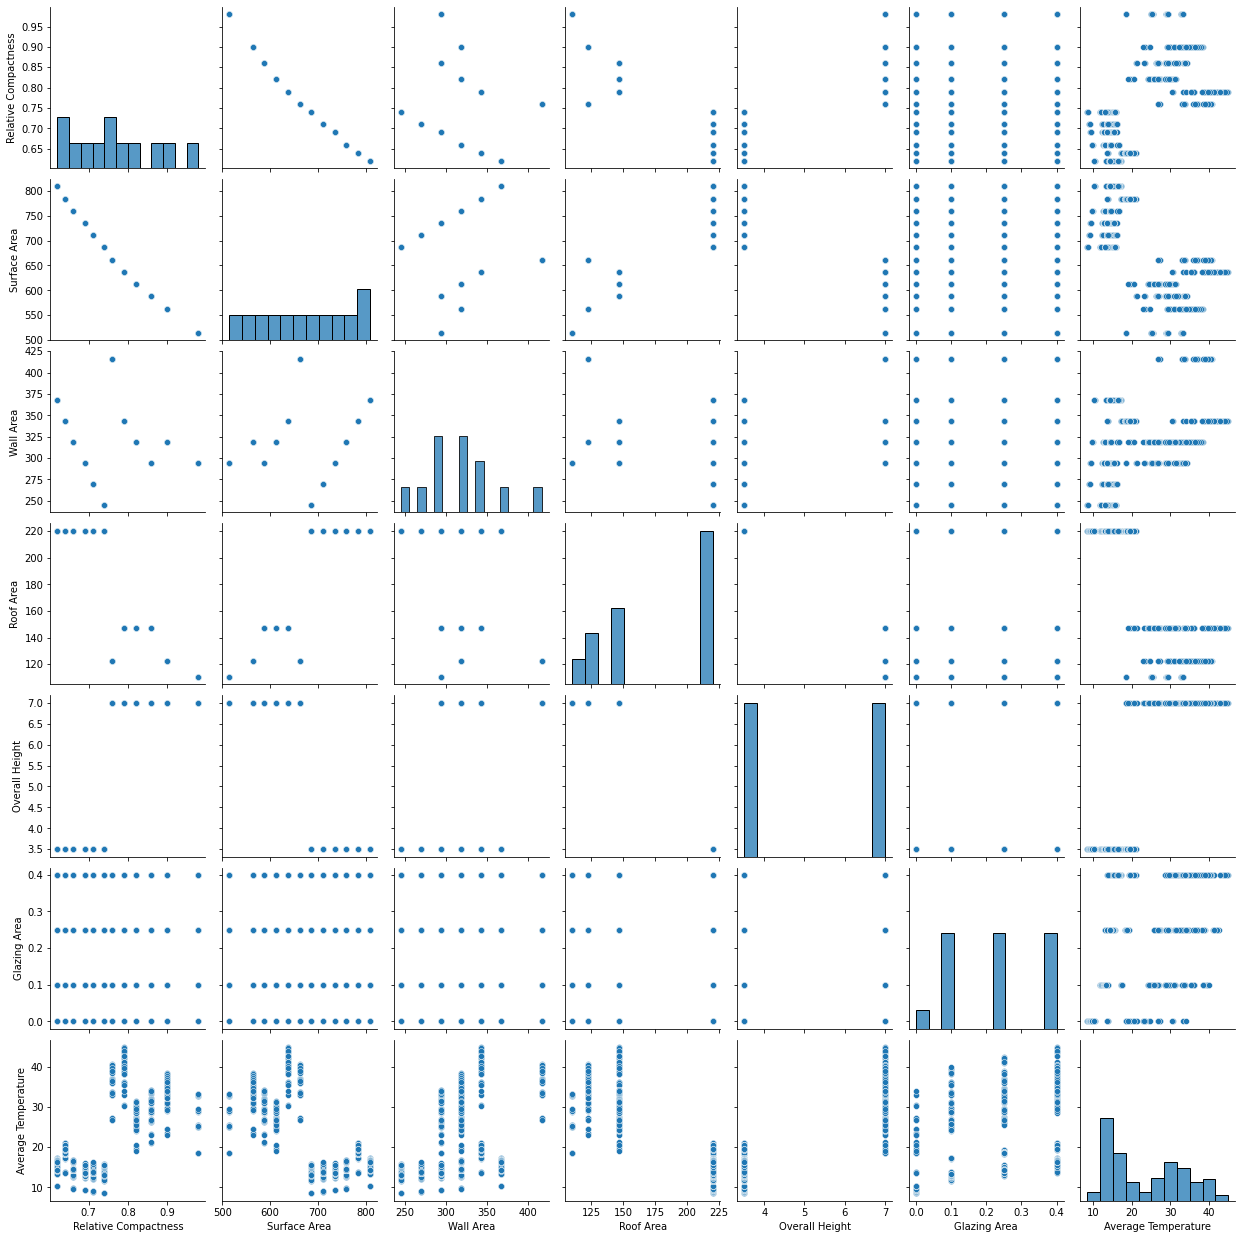

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data)

In [24]:
from sklearn.preprocessing import MinMaxScaler

X = data.loc[:, 'Relative Compactness':'Glazing Area']
y = data['Average Temperature']

mms = MinMaxScaler()
X_scaled = pd.DataFrame(mms.fit_transform(X),columns = X.columns)

X_scaled.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area
0,1.000000,0.000000,0.285714,0.000000,1.0,0.0
1,1.000000,0.000000,0.285714,0.000000,1.0,0.0
2,1.000000,0.000000,0.285714,0.000000,1.0,0.0
3,1.000000,0.000000,0.285714,0.000000,1.0,0.0
4,0.777778,0.166667,0.428571,0.111111,1.0,0.0


### 2.2 Modelling

In this section, you are going to verify the theory by evaluating models optimized on different Loss functions.

### Least Squares (MSE) Loss

👇 **10-Fold Cross-validate** a Linear Regression model optimized by **Stochastic Gradient Descent** (SGD) on a **Least Squares Loss** (MSE)



In [77]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import max_error, r2_score

scoring = ['max_error','r2']

model_ms = SGDRegressor(loss = "squared_error")

cv = cross_validate(model_ms, X_scaled, y, scoring = scoring, cv = 10)

cv

{'fit_time': array([0.01232195, 0.01146293, 0.00821304, 0.01101494, 0.01088619,
        0.01137185, 0.011338  , 0.00877213, 0.00676203, 0.00676394]),
 'score_time': array([0.00205207, 0.00161624, 0.00118399, 0.00117707, 0.00154185,
        0.00115919, 0.00107598, 0.00106668, 0.00102711, 0.00103092]),
 'test_max_error': array([-9.28165255, -9.17839704, -9.43485709, -9.66313396, -9.39226994,
        -9.07140855, -8.97646687, -9.39308825, -9.11673016, -8.34329043]),
 'test_r2': array([0.77460079, 0.89888665, 0.88544913, 0.87669387, 0.9257394 ,
        0.89263676, 0.92425027, 0.91299859, 0.8914416 , 0.93418179])}

👇 Compute 
- the mean cross validated R2 score `r2`
- the single biggest prediction error in °C of all your folds `max_error`?

(Tips: `max_error` is an accepted scoring metrics in sklearn)

In [80]:
r2 = cv['test_r2'].mean()
max_error = cv['test_max_error'].mean()

r2, max_error

(0.8916878857448942, -9.185129484757416)

### Mean Absolute Error (MAE) Loss

What if we optimize our model on the MAE instead?

👇 **10-Fold Cross-validate** a Linear Regression model optimized by **Stochastic Gradient Descent** (SGD) on a **MAE** Loss

<details>
<summary>💡 Hints</summary>

- MAE loss cannot be directly specified in `SGDRegressor`. It must be engineered by adjusting the right parameters

</details>

In [81]:
model_mae = SGDRegressor(loss = "epsilon_insensitive", max_iter=100000)

cv_mae = cross_validate(model_mae, X_scaled, y, scoring = scoring, cv = 10)
cv_mae

{'fit_time': array([0.00965619, 0.0077858 , 0.00742722, 0.00585699, 0.0057373 ,
        0.00516009, 0.00524902, 0.0052731 , 0.00553489, 0.00633597]),
 'score_time': array([0.00208473, 0.001652  , 0.00138211, 0.00146008, 0.00121784,
        0.00114489, 0.0013082 , 0.00111794, 0.00111604, 0.00196815]),
 'test_max_error': array([-11.44526726,  -9.93349615, -10.29966335, -10.92440845,
        -11.27386229, -11.17107708, -10.84063519, -12.0290837 ,
        -11.37710948, -10.92428295]),
 'test_r2': array([0.72750483, 0.8673142 , 0.86973062, 0.84326253, 0.90387645,
        0.85699679, 0.91141344, 0.87034399, 0.86900911, 0.92277126])}

👇 Compute 
- the mean cross validated R2 score `r2_mae`
- the single biggest prediction error of all your folds `max_error_mae`?

In [82]:
r2_mae = cv_mae['test_r2'].mean()
max_error_mae = cv_mae['test_max_error'].mean()

r2_mae, max_error_mae

(0.8642223207544157, -11.021888591265991)

## 3. Conclusion

❓Which of the models you evaluated seems the most appropriate for your task?

<details>
<summary> 🆘Answer </summary>
    
Although mean cross-validated r2 scores are approximately similar between the two models, the one optimized on a MAE has more chance to make larger mistakes from time to time, increasing risk of killing plants!

    
</details>

the first one

# 🏁 Check your code

In [83]:
from nbresult import ChallengeResult

result = ChallengeResult('loss_functions',
    r2 = r2,
    r2_mae = r2_mae,
    max_error = max_error,
    max_error_mae = max_error_mae,                     
)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /Users/humbert/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/humbert/code/HumbertMonnot/data-challenges/05-ML/04-Under-the-hood/01-Loss-Functions
plugins: anyio-3.4.0, dash-2.0.0
collecting ... collected 3 items

tests/test_loss_functions.py::TestLossFunctions::test_max_error_order PASSED [ 33%]
tests/test_loss_functions.py::TestLossFunctions::test_r2 PASSED          [ 66%]
tests/test_loss_functions.py::TestLossFunctions::test_r2_mae PASSED      [100%]

============================== 3 passed in 0.08s ===============================


💯 You can commit your code:

git add tests/loss_functions.pickle

git commit -m 'Completed loss_functions step'

git push origin master
